### **LSTM and CNN (EXTRA CREDIT PROJECT)**

This project aims to create a neural network model using LSTM and CNN to predict male and female names. Use nltk names data (if you are not sure how to download this data, you can use nltk.download('popular') to download the entire collection and load names data). As a part of nltk names data, you will have two files, male.txt (contains male names) and female.txt (contains female names). Randomly shuffle both the names and split the data into train, test data. Preprocess the data if necessary. Visualize the distribution of the names (males, females). You can use matplotlib python library or any other visualization library of your choice. You can use vectorize the data using the word embedding model of your choice (you can reuse the code from any of the colab notebooks we saw in class regarding vectorization. If reusing, specify from which notebook that code was taken).

Task 1: Create a convolutional neural network model with two 1D convolutional layers. Use sigmoid activation and apply a dropout of your desired units after creating the convolution layers. In the end, create a softmax layer. Predict whether the names in test data are male or female. Evaluate your predictions (you can use the scikit learn classification report).

Task 2: Create a simple sequential model with an LSTM layer of your desired units. Use sigmoid activation. Predict whether the names in test data are male or female. Evaluate your predictions (you can use the scikit learn classification report).

Task 3: Mixing LSTM and CNN for prediction. Combine LSTM and CNN layers (e.g., LSTM layer followed by CNN layer, etc.) to make predictions. Try different activation functions and dropout rates and report your results.

Submission: For tasks 1, 2, and 3, submit ipynb and html files. Report: Your report should have the Section 1: Aim of this assignment, introduction. Section 2: An explanation of LSTM and CNN (based on the materials you read). Section 3: Explanation of all three tasks. Screenshots of the code and results. Section 4: Compare all these three tasks and compare your results. Section 5: Conclusion.

Submission: Submit a PDF FILE of your report

**NOTE: calculate F1 score, Confusion matrix, precision and recall and make sure your accuracy is minimum of 70%. ****

In [ ]:
import tensorflow as tf
import numpy as np

import keras
from keras.utils.np_utils import to_categorical
import nltk,random
nltk.download("popular")

from nltk.corpus import names
from _collections import defaultdict
from nltk.probability import FreqDist

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
male_female_names = ([(name, 0.0) for name in names.words('male.txt')] + \
[(name, 1.0 ) for name in names.words('female.txt')])

random.seed(21)

random.shuffle(male_female_names)
print(male_female_names[0:10])
print(len(male_female_names))

[('Dorette', 1.0), ('Michaelina', 1.0), ('Derrol', 0.0), ('Rozella', 1.0), ('Van', 0.0), ('Amaleta', 1.0), ('Ephram', 0.0), ('Allis', 1.0), ('Arden', 1.0), ('Jana', 1.0)]
7944


In [ ]:
## First we need to convert strings to letters
updated_names = [(list(X.lower()),y) for (X,y) in male_female_names]
print(updated_names[21])

(['a', 's', 'h', 'l', 'i'], 1.0)


In [ ]:
len(updated_names)

7944

In [ ]:
names = []
labels = []

names = [val_name for val_name,x  in updated_names]
labels = [label for x , label in updated_names]

print(names[10:15])
print(labels[10:15])
len(names), len(labels)

[['a', 'r', 'l', 'e', 'e'], ['f', 'l', 'o'], ['a', 'd', 'a', 'i', 'r'], ['e', 'm', 'i', 'l', 'i', 'o'], ['w', 'o', 'o', 'd', 'y']]
[1.0, 1.0, 0.0, 0.0, 0.0]


(7944, 7944)

In [ ]:
import pandas as pd
df = pd.DataFrame (updated_names, columns = ['Name','Gender'])
print (df)

                                Name  Gender
0              [d, o, r, e, t, t, e]     1.0
1     [m, i, c, h, a, e, l, i, n, a]     1.0
2                 [d, e, r, r, o, l]     0.0
3              [r, o, z, e, l, l, a]     1.0
4                          [v, a, n]     0.0
...                              ...     ...
7939              [i, s, a, b, e, l]     1.0
7940              [z, u, l, e, m, a]     1.0
7941                    [k, a, y, e]     1.0
7942                 [b, e, c, k, y]     1.0
7943           [j, o, a, c, h, i, m]     0.0

[7944 rows x 2 columns]


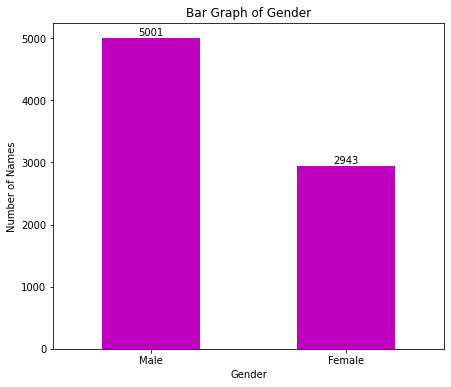

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gender = df['Gender'].value_counts()
plt.figure(figsize=(7, 6))
axis = gender.plot(kind='bar', rot=0, color="m")
axis.set_title("Bar Graph of Gender", y = 1)
axis.set_xlabel('Gender')
axis.set_ylabel('Number of Names')
axis.set_xticklabels(('Male', 'Female'))

for rect in axis.patches:
    y = rect.get_height()
    x = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y)
    axis.annotate(label, (x, y), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [ ]:
character = ''
for name in names:
    for s in name:
        character += s
characteru = set(character)
print(characteru)
vocab_size = len(characteru)
print('total character:', len(characteru))
char_index = dict((c, i) for i, c in enumerate(characteru))
index_character = dict((i, c) for i, c in enumerate(characteru))

index_character[10]

{'h', "'", 'u', 'g', 't', 'e', '-', 'd', 'a', 'j', 'i', 'r', 'l', 'c', 'w', 'x', 'q', 'k', 'o', 'n', 'p', 'z', 'y', 's', 'f', ' ', 'm', 'v', 'b'}
total character: 29


'i'

In [ ]:
def vectorize_names(names, verbose=False):
    vnames =[]
    for name in names:
        x = [char_index[c] for c in name]
        if verbose:
            print(x)
        vx = np.eye(len(char_index))[x]
        if verbose:
            print(vx[0:12])
        vnames.append(vx)
    return vnames

vectorize_names(names[0:2], verbose=True)

vnames = vectorize_names(names,verbose=False)

[7, 18, 11, 5, 4, 4, 5]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
[26, 10, 13, 0, 8, 5, 12, 10, 19, 8]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0

In [ ]:
from keras_preprocessing.sequence import pad_sequences

maxlen =20

vect_name =  pad_sequences(vnames, maxlen=maxlen)

print(len(vect_name[1]))

vect_name[2]

20


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Our vectorized training data
x_train = vect_name[1000:]
# Our vectorized test data
x_test = vect_name[:1000]

x_train.shape

(6944, 20, 29)

In [ ]:
x_test[27]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
len(x_test[27])

20

In [ ]:
y_ = to_categorical(labels)
print('y_.shape: ',y_.shape )
print(y_[5:26])

y_.shape:  (7944, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
y_train = y_[1000:]
y_test = y_[:1000]
y_train.shape

(6944, 2)

# **TASK-1**



In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers import Conv1D

In [ ]:
x_train.shape

(6944, 20, 29)

In [ ]:
inputs = Input(shape=(20, 29), name='input', dtype='float32')

inputs.shape

TensorShape([None, 20, 29])

In [ ]:
#parameter intilization
filter_size = 4
dense_ot = 10
kernel_val = [2, 3, 3, 3, 4, 5]
num_out = 2
batch_size = 42
epochs = 30

In [ ]:
cnn = Conv1D(filters=filter_size, kernel_size=kernel_val[0],
                     padding='same', activation='sigmoid',
                     input_shape=(20, 29))(inputs)
cnn1 = MaxPooling1D(pool_size=5)(cnn)

cnn2 = Conv1D(filters=filter_size, kernel_size=kernel_val[2],
                      padding='same', activation='sigmoid')(cnn1)
conv3 = Flatten()(cnn2)

out = Dropout(0.2)(Dense(dense_ot, activation='sigmoid')(conv3))

predict = Dense(num_out, activation='softmax', name='output')(out)

model_Conv1D = Model(inputs=inputs, outputs=predict)

model_Conv1D.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callback = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='min')

In [ ]:
history1=model_Conv1D.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1, callbacks=[callback, reduce_lr])

Epoch 1/30
133/133 [==============================] - 1s 5ms/step - loss: 0.6771 - accuracy: 0.5908 - val_loss: 0.6571 - val_accuracy: 0.6343 - lr: 0.0010
Epoch 2/30
133/133 [==============================] - 1s 5ms/step - loss: 0.6697 - accuracy: 0.6126 - val_loss: 0.6567 - val_accuracy: 0.6343 - lr: 0.0010
Epoch 3/30
126/133 [===========================>..] - ETA: 0s - loss: 0.6681 - accuracy: 0.6170
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
133/133 [==============================] - 1s 4ms/step - loss: 0.6689 - accuracy: 0.6164 - val_loss: 0.6566 - val_accuracy: 0.6343 - lr: 0.0010
Epoch 4/30
133/133 [==============================] - 1s 4ms/step - loss: 0.6644 - accuracy: 0.6252 - val_loss: 0.6566 - val_accuracy: 0.6343 - lr: 1.0000e-04
Epoch 5/30
123/133 [==========================>...] - ETA: 0s - loss: 0.6659 - accuracy: 0.6221
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
133/133 [==============================] 

In [ ]:
history_dict = history1.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [ ]:
val_acc = history1.history['val_accuracy']
acc=history1.history['accuracy']
print(val_acc)
print()
print(acc)

[0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105]

[0.5908190608024597, 0.6126012802124023, 0.6163816452026367, 0.6252025365829468, 0.6241224408149719, 0.6226822733879089, 0.626642644405365, 0.6216021776199341, 0.6232223510742188]


In [ ]:
predictions_value = model_Conv1D.predict(x_test)
predictions_value

32/32 [==============================] - 0s 2ms/step


array([[0.37478134, 0.6252186 ],
       [0.37448308, 0.6255169 ],
       [0.37498334, 0.6250167 ],
       ...,
       [0.37457508, 0.6254249 ],
       [0.37505075, 0.6249493 ],
       [0.37478134, 0.62521875]], dtype=float32)

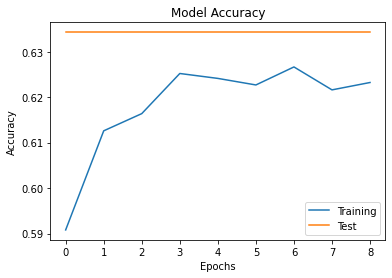

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'])

plt.show()

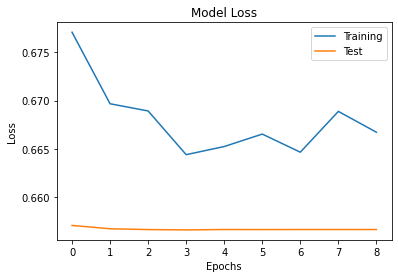

In [ ]:
#Plot model loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Test'])

plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

report = classification_report(np.argmax(y_test, axis=1),np.argmax(predictions_value, axis=1))
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions_value, axis=1)))

print(report)

[[  0 365]
 [  0 635]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       365
           1       0.64      1.00      0.78       635

    accuracy                           0.64      1000
   macro avg       0.32      0.50      0.39      1000
weighted avg       0.40      0.64      0.49      1000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **TASK-2**

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers import LSTM

In [ ]:
x_train.shape

(6944, 20, 29)

In [ ]:
inputs = Input(shape=(20, 29), name='input', dtype='float32')

'inputs.shape: ',inputs.shape

('inputs.shape: ', TensorShape([None, 20, 29]))

In [ ]:
#filter_size = 4
dense_ot = 10
#kernel_val = [2, 3, 3, 3, 4, 5]
num_out = 2
batch_size = 256
epochs = 30
units = 128

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Bidirectional(LSTM(128, activation='sigmoid', return_sequences=True), backward_layer=LSTM(128, return_sequences=True, go_backwards=True), input_shape=(20, 29)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax', activity_regularizer=l2(0.001)))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 20, 256)          161792    
 nal)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 20, 256)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               73984     
 nal)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 2)                 130       
                                                                 
Total params: 235,906
Trainable params: 235,906
Non-tr

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callback = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='max')

In [ ]:
history2=model.fit(x_train, y_train, batch_size=64,
           epochs=epochs, validation_split=0.2, verbose=True, callbacks=[callback, reduce_lr])

Epoch 1/30
87/87 [==============================] - 27s 220ms/step - loss: 0.5775 - accuracy: 0.7012 - val_loss: 0.4995 - val_accuracy: 0.7811 - lr: 0.0010
Epoch 2/30
87/87 [==============================] - 14s 155ms/step - loss: 0.5097 - accuracy: 0.7622 - val_loss: 0.4927 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 3/30
87/87 [==============================] - 13s 148ms/step - loss: 0.4876 - accuracy: 0.7743 - val_loss: 0.4640 - val_accuracy: 0.7826 - lr: 0.0010
Epoch 4/30
87/87 [==============================] - 12s 136ms/step - loss: 0.4660 - accuracy: 0.7813 - val_loss: 0.4461 - val_accuracy: 0.7919 - lr: 0.0010
Epoch 5/30
87/87 [==============================] - 17s 195ms/step - loss: 0.4511 - accuracy: 0.7897 - val_loss: 0.4309 - val_accuracy: 0.8020 - lr: 0.0010
Epoch 6/30
87/87 [==============================] - 14s 156ms/step - loss: 0.4371 - accuracy: 0.7969 - val_loss: 0.4232 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 7/30
87/87 [==============================] - 11s 132ms/st

In [ ]:
history_dict = history2.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


In [ ]:
validation_acc = history2.history['val_accuracy']
accuracy=history2.history['accuracy']
print(validation_acc)
print()
print(accuracy)

[0.7811375260353088, 0.7667386531829834, 0.782577395439148, 0.7919366359710693, 0.8020158410072327, 0.7955363392829895, 0.8084953427314758, 0.811375081539154, 0.8099352121353149, 0.809215247631073, 0.8149747848510742, 0.812095046043396, 0.814254879951477, 0.8156947493553162, 0.814254879951477, 0.814254879951477]

[0.7011701464653015, 0.7621962428092957, 0.7742574214935303, 0.781278133392334, 0.7897389531135559, 0.7969396710395813, 0.7906390428543091, 0.7940593957901001, 0.7953195571899414, 0.7960395812988281, 0.803960382938385, 0.8018001914024353, 0.8050404787063599, 0.80342036485672, 0.8082808256149292, 0.8100810050964355]


In [ ]:
predictions = model.predict(x_test)
predictions

32/32 [==============================] - 3s 26ms/step


array([[0.06555974, 0.9344402 ],
       [0.00814034, 0.99185956],
       [0.8252566 , 0.17474337],
       ...,
       [0.01882438, 0.9811756 ],
       [0.8815809 , 0.11841895],
       [0.0126966 , 0.9873034 ]], dtype=float32)

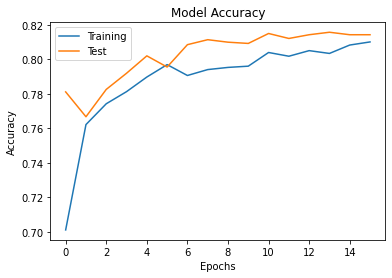

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'])

plt.show()

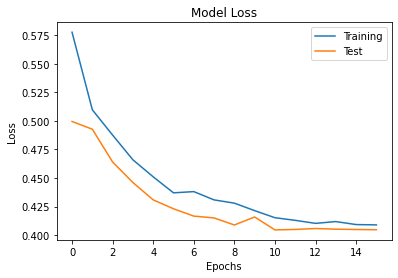

In [ ]:
#Plot model loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Test'])

plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

report = classification_report(np.argmax(y_test, axis=1),np.argmax(predictions, axis=1))
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)))

print(report)

[[256 109]
 [ 97 538]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       365
           1       0.83      0.85      0.84       635

    accuracy                           0.79      1000
   macro avg       0.78      0.77      0.78      1000
weighted avg       0.79      0.79      0.79      1000



# **TASK-3**

Mixing LSTM and CNN for prediction.

In [ ]:
filter_size = 2
dense_ot = 10
kernel_sizes = [2, 5, 3, 3, 4, 3]
num_out = 2
batch_size = 80
epochs = 10
units = 128

In [ ]:
lstm_in = LSTM(units,activation='sigmoid',input_shape=(20, 29),return_sequences=True)(inputs)
lstm1 = MaxPooling1D(pool_size=5)(lstm_in)

conv1 = Conv1D(filters=filter_size, kernel_size=kernel_sizes[2],
                     padding='same', activation='sigmoid')(lstm1)

conv2 = Flatten()(conv1)
dropout_layer=Dropout(0.3)(Dense(dense_ot, activation='sigmoid')(conv2))

conv3 = Conv1D(filters=filter_size, kernel_size=kernel_sizes[2],
                     padding='same', activation='relu')(lstm1)
conv4 = Flatten()(conv3)
dropout_layer=Dropout(0.3)(Dense(dense_ot, activation='sigmoid')(conv4))

pred=Dense(num_out,activation='softmax',name='output')(dropout_layer)

model_lstm_cnn=Model(inputs=inputs,outputs=pred)

model_lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callback = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, verbose=1, min_delta=1e-4, mode='max')

In [ ]:
history3=model_lstm_cnn.fit(x_train, y_train, batch_size=256,
           epochs=epochs, validation_split=0.2, verbose=True)

Epoch 1/30
22/22 [==============================] - 9s 312ms/step - loss: 0.6829 - accuracy: 0.6214 - val_loss: 0.6569 - val_accuracy: 0.6343
Epoch 2/30
22/22 [==============================] - 7s 300ms/step - loss: 0.6718 - accuracy: 0.6236 - val_loss: 0.6572 - val_accuracy: 0.6343
Epoch 3/30
22/22 [==============================] - 6s 295ms/step - loss: 0.6700 - accuracy: 0.6256 - val_loss: 0.6569 - val_accuracy: 0.6343
Epoch 4/30
22/22 [==============================] - 7s 299ms/step - loss: 0.6681 - accuracy: 0.6243 - val_loss: 0.6571 - val_accuracy: 0.6343
Epoch 5/30
22/22 [==============================] - 7s 297ms/step - loss: 0.6684 - accuracy: 0.6252 - val_loss: 0.6571 - val_accuracy: 0.6343
Epoch 6/30
22/22 [==============================] - 7s 300ms/step - loss: 0.6653 - accuracy: 0.6259 - val_loss: 0.6566 - val_accuracy: 0.6343
Epoch 7/30
22/22 [==============================] - 7s 296ms/step - loss: 0.6651 - accuracy: 0.6284 - val_loss: 0.6565 - val_accuracy: 0.6343
Epoch 

In [ ]:
validation_acc = history3.history['val_accuracy']
accuracy=history3.history['accuracy']
print(validation_acc)
print()
print(accuracy)

[0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.6342692375183105, 0.705543577671051, 0.7271418571472168, 0.7235420942306519, 0.7631389498710632, 0.7645788192749023]

[0.6214221715927124, 0.6235823631286621, 0.6255625486373901, 0.6243024468421936, 0.6252025365829468, 0.6259226202964783, 0.6284428238868713, 0.6250225305557251, 0.6273627281188965, 0.6271827220916748, 0.6268227100372314, 0.6273627281188965, 0.6273627281188965, 0.6273627281188965, 0.6273627281188965, 0.6273627281188965, 0.6273627281188965, 0.6275427341461182, 0.6271827220916748, 0.6268227100372314

In [ ]:
predictions = model_lstm_cnn.predict(x_test)
predictions

32/32 [==============================] - 1s 24ms/step


array([[0.41841868, 0.58158123],
       [0.41786903, 0.582131  ],
       [0.41900235, 0.5809975 ],
       ...,
       [0.41862538, 0.5813746 ],
       [0.41888154, 0.58111846],
       [0.41883948, 0.5811604 ]], dtype=float32)

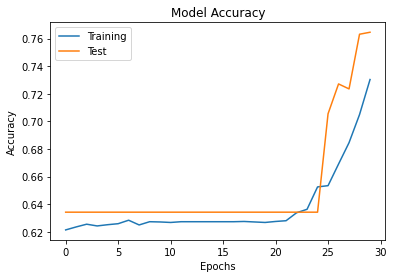

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'])

plt.show()

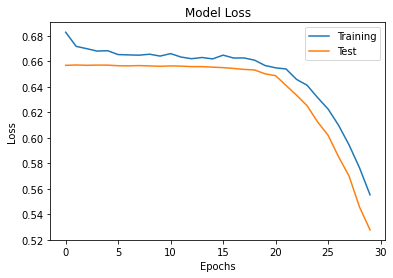

In [ ]:
# Plot model loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Test'])

plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

report = classification_report(np.argmax(y_test, axis=1),np.argmax(predictions, axis=1))
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1)))

print(report)

[[201 164]
 [120 515]]
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       365
           1       0.76      0.81      0.78       635

    accuracy                           0.72      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.71      0.72      0.71      1000



# **TASK-3 Evaluation**

In [ ]:
score, acc = model_lstm_cnn.evaluate(x_test, y_test, batch_size=64)
print('score', score)
print('accuracy', acc)

16/16 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.6350
score 0.6571360230445862
accuracy 0.6349999904632568


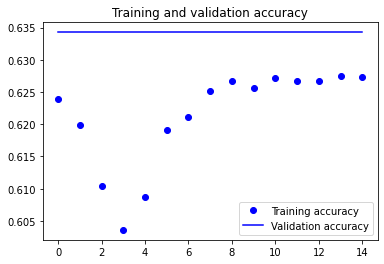

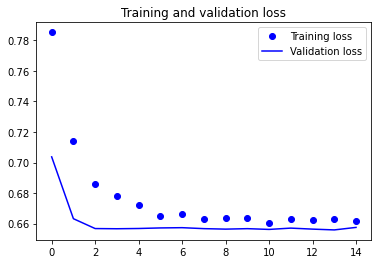

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


val_acc = history3.history['val_accuracy']
acc=history3.history['accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()